In [21]:
import numpy as np
import pandas as pd

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.ensemble import VotingClassifier, StackingClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder, StandardScaler

In [19]:
!pip install xgboost

   ---------------------------------------- 0.0/150.0 MB ? eta -:--:--
    --------------------------------------- 2.2/150.0 MB 45.8 MB/s eta 0:00:04
   - -------------------------------------- 4.7/150.0 MB 50.0 MB/s eta 0:00:03
   - -------------------------------------- 7.2/150.0 MB 50.9 MB/s eta 0:00:03
   -- ------------------------------------- 9.5/150.0 MB 50.5 MB/s eta 0:00:03
   -- ------------------------------------- 11.0/150.0 MB 50.4 MB/s eta 0:00:03
   -- ------------------------------------- 11.0/150.0 MB 50.4 MB/s eta 0:00:03
   --- ------------------------------------ 12.0/150.0 MB 36.4 MB/s eta 0:00:04
   --- ------------------------------------ 13.7/150.0 MB 34.4 MB/s eta 0:00:04
   --- ------------------------------------ 14.3/150.0 MB 32.7 MB/s eta 0:00:05
   ---- ----------------------------------- 15.4/150.0 MB 28.5 MB/s eta 0:00:05
   ---- ----------------------------------- 16.1/150.0 MB 25.2 MB/s eta 0:00:06
   ---- ----------------------------------- 16.9/150.

In [11]:
# -----------------------------
# Load and Preprocess Titanic Data
# -----------------------------
data = pd.read_csv('Titanic-Dataset.csv')
data = data[['Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked']]
data.dropna(inplace=True)

In [13]:
data

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S
...,...,...,...,...,...,...,...,...
885,0,3,female,39.0,0,5,29.1250,Q
886,0,2,male,27.0,0,0,13.0000,S
887,1,1,female,19.0,0,0,30.0000,S
889,1,1,male,26.0,0,0,30.0000,C


In [27]:
# Encode categorical features
label_encoders = {}
for col in ['Sex', 'Embarked']:
    le = LabelEncoder()
    data[col] = le.fit_transform(data[col])
    label_encoders[col] = le

# Features and Target
X = data.drop('Survived', axis=1)
y = data['Survived']

# Feature Scaling
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [29]:
# -----------------------------
# Train/Test Split
# -----------------------------
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

In [33]:
# 1. Voting Classifier
voting_model = VotingClassifier(estimators=[
    ('SVC', SVC(probability=True)),
    ('LR', LogisticRegression()),
    ('KNN', KNeighborsClassifier())
], voting='soft')

In [35]:
# 2. Stacking Classifier
stacking_model = StackingClassifier(
    estimators=[('svc', SVC()), ('knn', KNeighborsClassifier())],
    final_estimator=LogisticRegression()
)

In [37]:
# 3. XGBoost Classifier
xgb_model = XGBClassifier(use_label_encoder=False, eval_metric='logloss')

In [ ]:

model = stacking_model  

In [39]:
# -----------------------------
# Train & Evaluate
# -----------------------------
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

print("Accuracy: %.2f%%" % (accuracy_score(y_test, y_pred) * 100))

Accuracy: 81.82%


In [41]:
model = voting_model   # Change to:voting_model

In [43]:
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

print("Accuracy: %.2f%%" % (accuracy_score(y_test, y_pred) * 100))

Accuracy: 81.12%


In [45]:
model = xgb_model   # Change to:voting_model

In [47]:
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

print("Accuracy: %.2f%%" % (accuracy_score(y_test, y_pred) * 100))

Accuracy: 76.22%


C:\Users\ML\anaconda3\Lib\site-packages\xgboost\training.py:183: UserWarning: [10:03:52] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


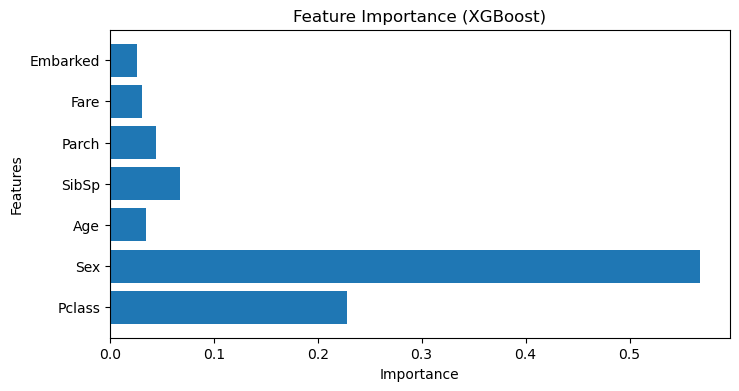

In [51]:
import matplotlib.pyplot as plt  # Make sure this line is included

if hasattr(model, 'feature_importances_'):
    plt.figure(figsize=(8, 4))
    plt.barh(X.columns, model.feature_importances_)
    plt.title("Feature Importance (XGBoost)")
    plt.xlabel("Importance")
    plt.ylabel("Features")
    plt.show()
